In [1]:
import pandas as pd
import numpy as np
import requests
from gspread_pandas import Spread, Client
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm

In [2]:
dates = [20200116,
20200123,
20200125,
20200201,
20200208,
20200213,
20200215,
20200220,
20200222,
20200227,
20200319,
20200326,
20200402,
20200416]

attendance = {}
proj_meetings = {}
worksessions = {}
df = pd.DataFrame()

In [3]:
len(dates)

14

In [4]:
for date in dates:
    spread = Spread('Attendance ' + str(date) + ' (Responses)')
    temp = spread.sheet_to_df(sheet='Form Responses 1')
    temp['date'] = date
    frames = [df,temp]
    df = pd.concat(frames)
    attendance[pd.to_datetime(str(date), format='%Y%m%d', errors='ignore')] = len(temp)
    if pd.to_datetime(str(date), format = '%Y%m%d', errors='ignore').weekday() == 3:
        proj_meetings[pd.to_datetime(str(date), format='%Y%m%d', errors='ignore')] = len(temp)
    if pd.to_datetime(str(date), format = '%Y%m%d', errors='ignore').weekday() == 5:
        worksessions[pd.to_datetime(str(date), format='%Y%m%d', errors='ignore')] = len(temp)

In [5]:
attendance
proj_meetings
worksessions

{Timestamp('2020-01-25 00:00:00'): 39,
 Timestamp('2020-02-01 00:00:00'): 46,
 Timestamp('2020-02-08 00:00:00'): 38,
 Timestamp('2020-02-15 00:00:00'): 40,
 Timestamp('2020-02-22 00:00:00'): 36}

In [6]:
attend_sr = pd.Series(attendance)

In [7]:
proj_sr = pd.Series(proj_meetings)

In [8]:
work_sr = pd.Series(worksessions)

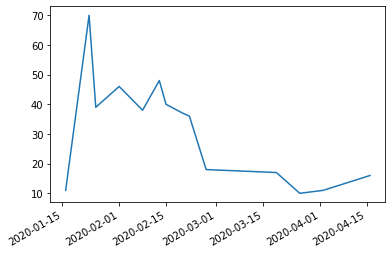

In [9]:
attend_sr.plot()

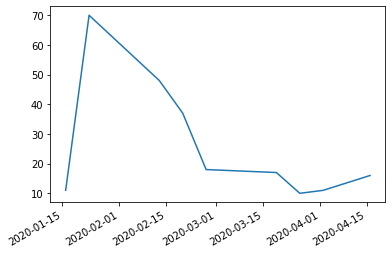

In [10]:
proj_sr.plot()

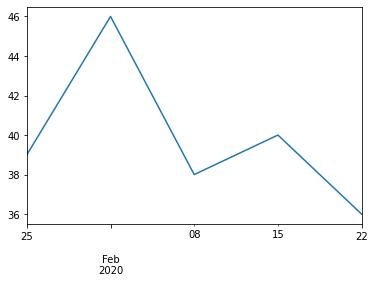

In [11]:
work_sr.plot()

In [12]:
df['early'] = None

In [13]:
df = df.reset_index()

In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp']).apply(lambda x: x)

In [15]:
df

,Timestamp,Email Address,First Name,Last Name,How much wood could a woodchuck chuck if a woodchuck could chuck wood?,date,"How would you abbreviate ""as per usual""? (i.e. how do you spell ju:ʒ)",Vibe Check!,Olives on pizza?,What do you think of your technical improvement during this session?,...,First (free!!) social event next Saturday! What would you like to do?,Is a doll a stuffed animal?,Read any good books recently?,"If you're attending the social event, please sign this online waiver.","If you were a type of jeans, what type would you be?",Best teleconferencing solution,Data is to Datum as _____.,"If you could be stranded on an island with anyone in MDST, which island would you want to be stranded on?","Pick the smallest prime number you can, but if someone else picks the same number, your choice will be invalidated.",early
0,2020-01-16 17:46:40,naitian@umich.edu,Naitian,Zhou,5,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2020-01-16 17:46:45,aashisht@umich.edu,Aashish,Tripathee,4,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,2020-01-16 17:47:42,justrite@umich.edu,Justin,Ritenburgh,3,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,2020-01-16 17:49:42,ericch@umich.edu,Eric,Chen,4,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,2020-01-16 17:55:55,lijane@umich.edu,Jane,Li,5,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,2020-04-16 18:01:21,tejaskul@umich.edu,Tejas,Kulkarni,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,None
433,2020-04-16 18:02:11,reneeli@umich.edu,Renee,Li,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,None
434,2020-04-16 18:02:43,derryiri@umich.edu,Iris,Derry,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,None
435,2020-04-16 18:03:12,burteth@umich.edu,Ethan,Burt,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,None


In [16]:
thurs_df = df.loc[df['Timestamp'].dt.weekday == 3 ]

In [17]:
thurs_df

,Timestamp,Email Address,First Name,Last Name,How much wood could a woodchuck chuck if a woodchuck could chuck wood?,date,"How would you abbreviate ""as per usual""? (i.e. how do you spell ju:ʒ)",Vibe Check!,Olives on pizza?,What do you think of your technical improvement during this session?,...,First (free!!) social event next Saturday! What would you like to do?,Is a doll a stuffed animal?,Read any good books recently?,"If you're attending the social event, please sign this online waiver.","If you were a type of jeans, what type would you be?",Best teleconferencing solution,Data is to Datum as _____.,"If you could be stranded on an island with anyone in MDST, which island would you want to be stranded on?","Pick the smallest prime number you can, but if someone else picks the same number, your choice will be invalidated.",early
0,2020-01-16 17:46:40,naitian@umich.edu,Naitian,Zhou,5,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2020-01-16 17:46:45,aashisht@umich.edu,Aashish,Tripathee,4,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,2020-01-16 17:47:42,justrite@umich.edu,Justin,Ritenburgh,3,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,2020-01-16 17:49:42,ericch@umich.edu,Eric,Chen,4,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,2020-01-16 17:55:55,lijane@umich.edu,Jane,Li,5,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,2020-04-16 18:01:21,tejaskul@umich.edu,Tejas,Kulkarni,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,None
433,2020-04-16 18:02:11,reneeli@umich.edu,Renee,Li,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,None
434,2020-04-16 18:02:43,derryiri@umich.edu,Iris,Derry,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,None
435,2020-04-16 18:03:12,burteth@umich.edu,Ethan,Burt,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,None


In [18]:
for index, row in thurs_df.iterrows():
    if row[0].time() < datetime.datetime(2000,5,15,17).time():
        thurs_df.loc[index,'early'] = 1
    else:
        thurs_df.loc[index,'early'] = 0


/Users/coding/Documents/MDST/attendance-analysis/venv/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
late_sr = thurs_df[thurs_df['early'] != 1].groupby(['date']).size()

In [20]:
total_sr = thurs_df.groupby(['date']).size()

In [21]:
early_sr = total_sr - late_sr

In [22]:
early_array = sm.add_constant(early_sr.values)
total_array = total_sr.values

In [23]:
model = sm.OLS(total_array,early_array)

In [24]:
res = model.fit()

In [25]:
res.params

array([14.2056984 ,  1.47498263])

In [26]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     4.839
Date:                Sun, 19 Jul 2020   Prob (F-statistic):             0.0637
Time:                        14:51:28   Log-Likelihood:                -37.115
No. Observations:                   9   AIC:                             78.23
Df Residuals:                       7   BIC:                             78.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2057      7.895      1.799      0.1

/Users/coding/Documents/MDST/attendance-analysis/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


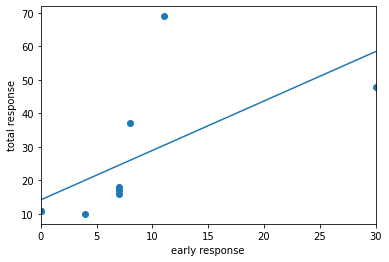

In [27]:
from statsmodels.graphics.regressionplots import abline_plot

fig = sm.graphics.abline_plot(model_results=res)
ax = fig.axes[0]
ax.scatter(early_array[:,1],total_array)
ax.set_xlabel('early response')
ax.set_ylabel('total response')
plt.show()

In [28]:
fa19_dates = [20191003,
             20191024,
             20191031,
             20191107,
             20191114,
             20191121,
             20191205]

fa_df = pd.DataFrame()

In [29]:
for date in fa19_dates:
    spread = Spread('Attendance ' + str(date) + ' (Responses)')
    temp = spread.sheet_to_df(sheet='Form Responses 1')
    temp['date'] = date
    frames = [fa_df,temp]
    fa_df = pd.concat(frames)

In [31]:
fa_df = fa_df.reset_index()

In [33]:
fa_df['Timestamp'] = pd.to_datetime(fa_df['Timestamp']).apply(lambda x: x)

In [34]:
fa_thurs_df = fa_df.loc[fa_df['Timestamp'].dt.weekday == 3 ]

In [35]:
fa_thurs_df

,Timestamp,Email Address,First Name,Last Name,Would you like to see weekly polls on the attendance?,date,"""Deep learning is overrated. I only use ____""",The best Halloween candy is:,"""____ data is the best kind of data""",Is it winter yet?,Vibe Check,What is a vibe check?,"""Michigan is a ____ school.""",Bonus: what MDST apparel are you interested in?
0,2019-10-03 17:58:22,aannamal@umich.edu,Arun,Annamalai,Yes,20191003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-03 17:58:27,ericch@umich.edu,Eric,Chen,Yes,20191003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-10-03 17:58:42,stphn@umich.edu,Stephen,Nguyen,Yes,20191003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-10-03 18:00:47,shendl@umich.edu,Simona,Hendl,Yes,20191003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-10-03 18:03:57,hcoles@umich.edu,Hannah,Coles,Yes,20191003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2019-12-05 17:38:58,naitian@umich.edu,Naitian,Zhou,NaN,20191205,NaN,NaN,NaN,NaN,NaN,NaN,school,"Michigan Data Science Tee, Michigan Data Scien..."
89,2019-12-05 17:52:20,kasfaw@umich.edu,Kidus,Asfaw,NaN,20191205,NaN,NaN,NaN,NaN,NaN,NaN,inferior-to-OSU,Michigan Data Science (T)Quarter-Zips
90,2019-12-05 18:01:31,hcoles@umich.edu,Hannah,Coles,NaN,20191205,NaN,NaN,NaN,NaN,NaN,NaN,school,"Michigan Data Science Tee, Michigan Data Scien..."
91,2019-12-05 18:03:00,rubyh@umich.edu,Ruby,Hickman,NaN,20191205,NaN,NaN,NaN,NaN,NaN,NaN,"football, school","Michigan Data Science Tux, SOCKS"


In [36]:
for index, row in fa_thurs_df.iterrows():
    if row[0].time() < datetime.datetime(2000,5,15,17).time():
        fa_thurs_df.loc[index,'early'] = 1
    else:
        fa_thurs_df.loc[index,'early'] = 0


/Users/coding/Documents/MDST/attendance-analysis/venv/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/coding/Documents/MDST/attendance-analysis/venv/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [50]:
fa_thurs_df[fa_thurs_df['early'] != 1].groupby(['date']).size()

date
20191003    36
20191024     9
20191031     9
20191107     7
20191114     3
20191121     6
20191205     6
dtype: int64

In [40]:
fa_late_sr = fa_thurs_df[fa_thurs_df['early'] != 1].groupby(['date']).size()

In [41]:
fa_total_sr = fa_thurs_df.groupby(['date']).size()

In [42]:
fa_early_sr = fa_total_sr - fa_late_sr

In [43]:
fa_early_array = sm.add_constant(fa_early_sr.values)
fa_total_array = fa_total_sr.values

In [52]:
fa_early_array

array([[1., 0.],
       [1., 6.],
       [1., 0.],
       [1., 4.],
       [1., 0.],
       [1., 2.],
       [1., 0.]])

In [54]:
model = sm.OLS(fa_total_array[1:],fa_early_array[1:])

In [55]:
res = model.fit()

In [56]:
res.params

array([5.79166667, 1.4375    ])

In [57]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     13.77
Date:                Sun, 19 Jul 2020   Prob (F-statistic):             0.0206
Time:                        15:01:00   Log-Likelihood:                -12.004
No. Observations:                   6   AIC:                             28.01
Df Residuals:                       4   BIC:                             27.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7917      1.183      4.894      0.0

/Users/coding/Documents/MDST/attendance-analysis/venv/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


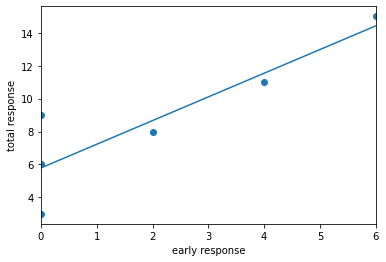

In [60]:
from statsmodels.graphics.regressionplots import abline_plot

fig = sm.graphics.abline_plot(model_results=res)
ax = fig.axes[0]
ax.scatter(fa_early_array[1:,1],fa_total_array[1:])
ax.set_xlabel('early response')
ax.set_ylabel('total response')
plt.show()

In [93]:
year_early = np.concatenate((early_sr.values,fa_early_sr.values[1:]), axis = None)

In [94]:
year_total = np.concatenate((total_sr.values,fa_total_sr.values[1:]), axis = None)

In [95]:
year_total

array([11, 69, 48, 37, 18, 17, 10, 11, 16, 15,  9, 11,  3,  8,  6])

In [96]:
model = sm.OLS(year_total,sm.add_constant(year_early))

In [97]:
res = model.fit()

In [98]:
res.params

array([9.47418612, 1.70799079])

In [99]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     13.69
Date:                Sun, 19 Jul 2020   Prob (F-statistic):            0.00267
Time:                        15:09:34   Log-Likelihood:                -58.855
No. Observations:                  15   AIC:                             121.7
Df Residuals:                      13   BIC:                             123.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4742      4.305      2.201      0.0

/Users/coding/Documents/MDST/attendance-analysis/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


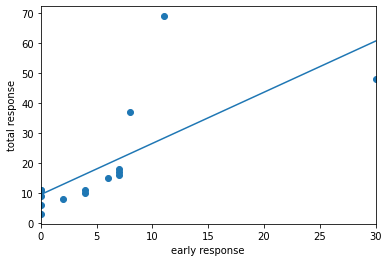

In [100]:
from statsmodels.graphics.regressionplots import abline_plot

fig = sm.graphics.abline_plot(model_results=res)
ax = fig.axes[0]
ax.scatter(year_early,year_total)
ax.set_xlabel('early response')
ax.set_ylabel('total response')
plt.show()